<a href="https://colab.research.google.com/github/wanruu/CS5487/blob/main/svm_poly_degree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.model_selection import RepeatedKFold


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import contingency_matrix

import matplotlib.pyplot as plt
import tqdm

In [2]:
vecs=np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/digits4000_txt/digits4000_digits_vec.txt')
labels=np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/digits4000_txt/digits4000_digits_labels.txt')

In [3]:
train_data=vecs[:2000]
test_data=vecs[2000:]
train_label=labels[:2000]
test_label=labels[2000:]

In [4]:
train_data, train_label = shuffle(train_data, train_label, random_state=123)
test_data, test_label = shuffle(test_data, test_label, random_state=123)

100%|██████████| 20/20 [00:56<00:00,  2.83s/it]


[2, 1.0, 0.9315]


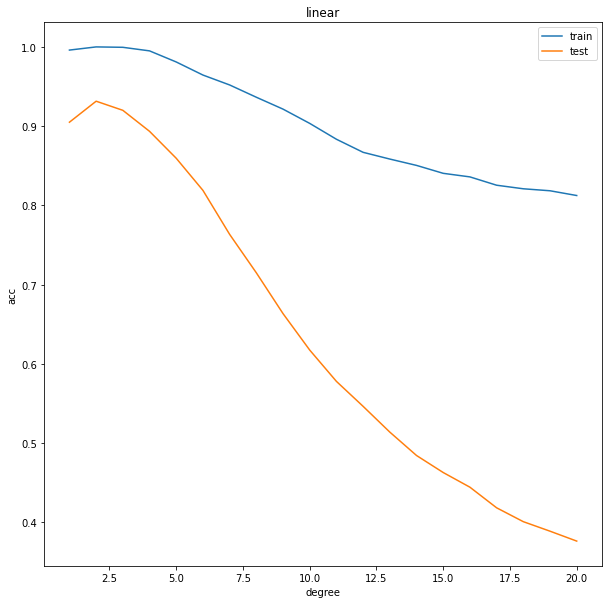

In [17]:
degree=[]
train_acc_linear=[]
test_acc_linear=[]
for i in tqdm.tqdm(range(20)):
  d=i+1
  classifier = svm.SVC(C=10,degree=d,kernel='poly')
  classifier.fit(train_data, train_label)
  degree.append(d)
  train_acc_linear.append(classifier.score(train_data, train_label))
  test_acc_linear.append(classifier.score(test_data, test_label))
plt.figure(figsize=(10, 10))
plt.plot(degree,train_acc_linear,label='train')
plt.plot(degree,test_acc_linear,label='test')
plt.xlabel('degree')
plt.ylabel('acc')
plt.title('linear')
plt.legend()
plt.show

#best c
idx=test_acc_linear.index(max(test_acc_linear))
print([degree[idx],train_acc_linear[idx],max(test_acc_linear)])